<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/FAO_Mejorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descargar y descomprimir el dataset
!mkdir -p ./trabajo
!wget -O ./trabajo/fao.zip "https://bulks-faostat.fao.org/production/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).zip"
!unzip ./trabajo/fao.zip -d ./trabajo/

--2024-11-30 15:43:46--  https://bulks-faostat.fao.org/production/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).zip
Resolving bulks-faostat.fao.org (bulks-faostat.fao.org)... 3.167.212.83, 3.167.212.53, 3.167.212.79, ...
Connecting to bulks-faostat.fao.org (bulks-faostat.fao.org)|3.167.212.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20526629 (20M) [application/zip]
Saving to: ‘./trabajo/fao.zip’

./trabajo/fao.zip   100%[===================>]  19.58M  62.1MB/s    in 0.3s    

2024-11-30 15:43:47 (62.1 MB/s) - ‘./trabajo/fao.zip’ saved [20526629/20526629]

Archive:  ./trabajo/fao.zip
 extracting: ./trabajo/Emisiones_Totales_S_Códigodelproductos.csv  
  inflating: ./trabajo/Emisiones_Totales_S_Códigodeláreas.csv  
  inflating: ./trabajo/Emisiones_Totales_S_Elementos.csv  
 extracting: ./trabajo/Emisiones_Totales_S_Fuentes.csv  
 extracting: ./trabajo/Emisiones_Totales_S_Símbolos.csv  
  inflating: ./trabajo/Emisiones_Totales_S_Todos_los_Datos_(Normali

In [18]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

# Cargar el dataset
data_path = './trabajo/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).csv'
data = pd.read_csv(data_path)
# Renombrar columnas para simplificar
data_clean = data.rename(columns={
    'Área': 'Pais',
    'Producto': 'Producto',
    'Elemento': 'Elemento',
    'Valor': 'Valor'
}).copy()



In [19]:
# Verificar datos cargados
print("Primeras filas de los datos limpios:")
print(data_clean.head())

Primeras filas de los datos limpios:
   Código del área Código del área (M49)        Pais  Código del producto  \
0                2                  '004  Afganistán                 5064   
1                2                  '004  Afganistán                 5064   
2                2                  '004  Afganistán                 5064   
3                2                  '004  Afganistán                 5064   
4                2                  '004  Afganistán                 5064   

             Producto  Código del elemento                  Elemento  \
0  Residuos agrícolas                 7234  Emisiones directas (N2O)   
1  Residuos agrícolas                 7234  Emisiones directas (N2O)   
2  Residuos agrícolas                 7234  Emisiones directas (N2O)   
3  Residuos agrícolas                 7234  Emisiones directas (N2O)   
4  Residuos agrícolas                 7234  Emisiones directas (N2O)   

   Código del año   Año  Código fuente      Fuente     Unidad   Val

In [20]:
# Verificar los nombres únicos de las regiones y productos
print("Regiones disponibles en el dataset:")
print(data_clean['Pais'].unique())

Regiones disponibles en el dataset:
['Afganistán' 'Albania' 'Alemania' 'Andorra' 'Angola' 'Anguila'
 'Antigua y Barbuda' 'Antillas Neerlandesas (ex)' 'Arabia Saudita'
 'Argelia' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaiyán' 'Bahamas' 'Bahrein' 'Bangladesh' 'Barbados' 'Belarús'
 'Bélgica' 'Bélgica-Luxemburgo' 'Belice' 'Benin' 'Bermudas' 'Bhután'
 'Bolivia (Estado Plurinacional de)' 'Bosnia y Herzegovina' 'Botswana'
 'Brasil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Camboya' 'Camerún' 'Canadá' 'Chad' 'Checoslovaq' 'Chequia'
 'Chile' 'China' 'China, Continental' 'China, RAE de Hong Kong'
 'China, RAE de Macao' 'China, Taiwán provincia de' 'Chipre' 'Colombia'
 'Comoras' 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croacia' 'Cuba'
 'Dinamarca' 'Djibouti' 'Dominica' 'Ecuador' 'Egipto' 'El Salvador'
 'Emiratos Árabes Unidos' 'Eritrea' 'Eslovaquia' 'Eslovenia' 'España'
 'Estados Unidos de América' 'Estonia' 'Eswatini' 'Etiopía' 'Etiopía RDP'
 'Federac

In [21]:
print("Productos disponibles en el dataset:")
print(data_clean['Producto'].unique())

Productos disponibles en el dataset:
['Residuos agrícolas' 'Cultivo del arroz' 'Quemado de residuos agrícolas'
 'Fermentación entérica' 'Gestión del estiércol'
 'Estiércol depositado en las pasturas' 'Estiércol aplicado a los suelos'
 'Fertilizantes sintéticos' 'Suelos orgánicos drenados'
 'Suelos orgánicos drenados (CO2)' 'Suelos orgánicos drenados (N2O)'
 'On-farm energy use' 'Tierras forestales' 'Conversión neta de bosques'
 'Incendios de sabana' 'Incendios en suelos de turba'
 'Incendios forestales' 'Incendios en los bosques tropicales húmedos'
 'Eliminación de desechos de sistemas agroalimentarios'
 'Fabricación de fertilizantes' 'Venta de alimentos'
 'Consumo\xa0de alimentos en los hogares' 'Transformación\xa0de alimentos'
 'Energía' 'IPPU' 'Desechos' 'Otro' 'Sistemas agroalimentarios'
 'Farm gate' 'Cambios de uso de la tierra' 'Pre y\xa0post-producción'
 'Emisiones en tierras agrícolas' 'Emisiones derivadas de los cultivos'
 'Emissiones derivadas del sector ganadero' 'IPCC Agric

In [22]:
# Ajustar regiones para MERCOSUR y TLCAN
mercosur_region = "América del Sur"
tlcan_region = "América septentrional"

In [23]:
# Agrupar emisiones por año y región
emisiones_anuales = data_clean.groupby(['Año', 'Pais'])['Valor'].sum().unstack()

In [24]:
# Filtrar regiones
mercosur_anual = emisiones_anuales.get(mercosur_region, pd.Series(dtype='float64'))
tlcan_anual = emisiones_anuales.get(tlcan_region, pd.Series(dtype='float64'))

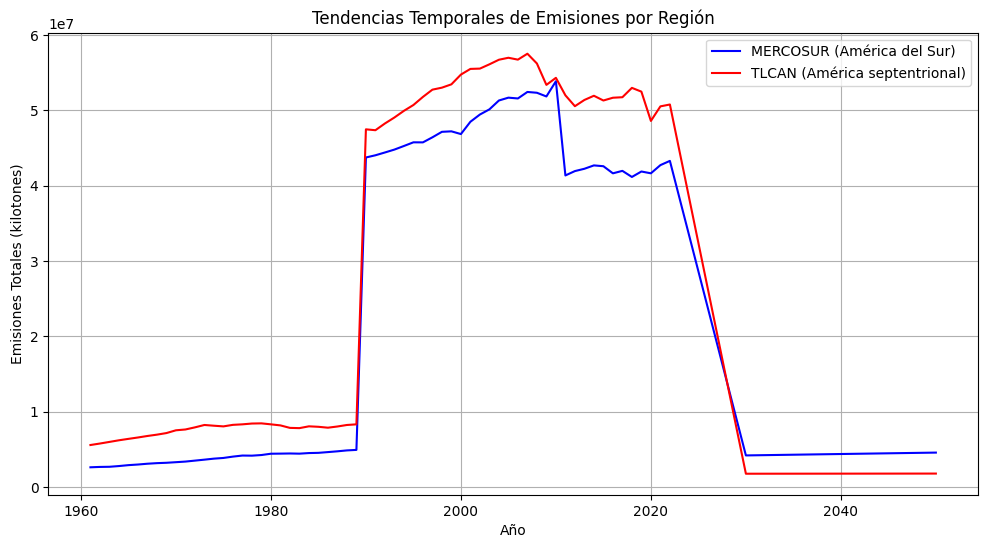

In [25]:
# Graficar tendencias por región
plt.figure(figsize=(12, 6))
plt.plot(mercosur_anual, label='MERCOSUR (América del Sur)', color='blue')
if not tlcan_anual.empty:
    plt.plot(tlcan_anual, label='TLCAN (América septentrional)', color='red')
plt.title("Tendencias Temporales de Emisiones por Región")
plt.ylabel("Emisiones Totales (kilotones)")
plt.xlabel("Año")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# 2. Análisis de Actividades Clave

# Actividades relevantes seleccionadas
actividades_relevantes = [
    "Cultivo del arroz",
    "Fermentación entérica",
    "Fertilizantes sintéticos",
    "Residuos agrícolas",
    "Gestión del estiércol"
]

In [27]:
# Filtrar datos por MERCOSUR y actividades relevantes
mercosur_actividades = data_clean[
    (data_clean['Pais'] == mercosur_region) &
    (data_clean['Producto'].isin(actividades_relevantes))
]

In [28]:
# Agrupar por actividad y calcular emisiones totales en MERCOSUR
actividades_mercosur = mercosur_actividades.groupby('Producto')['Valor'].sum()

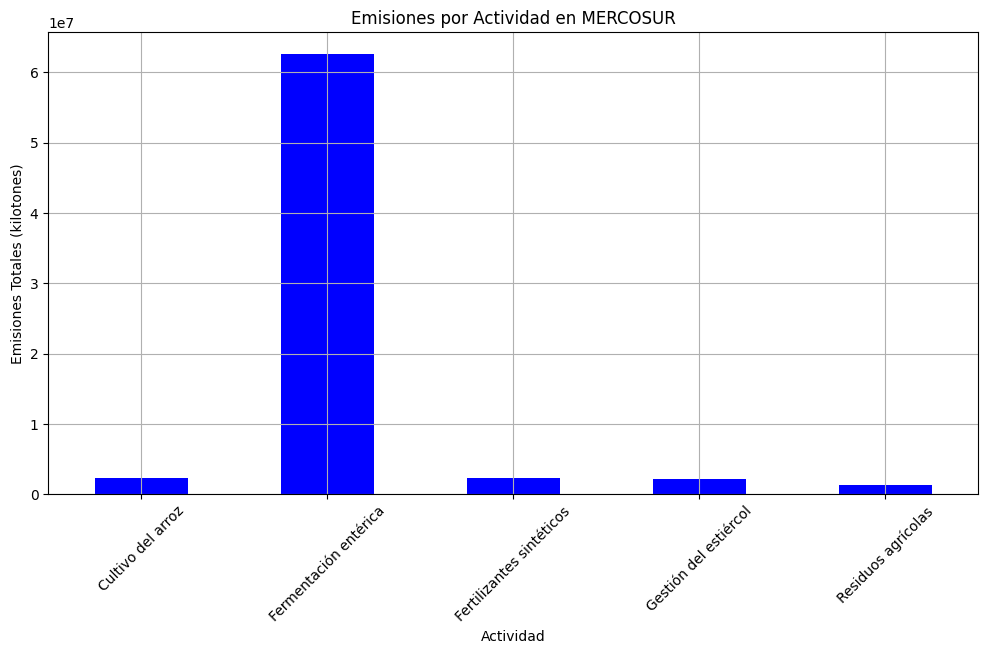

In [29]:
# Graficar las emisiones por actividad en MERCOSUR
plt.figure(figsize=(12, 6))
actividades_mercosur.plot(kind='bar', color='blue')
plt.title("Emisiones por Actividad en MERCOSUR")
plt.ylabel("Emisiones Totales (kilotones)")
plt.xlabel("Actividad")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [30]:
# Filtrar datos por TLCAN y actividades relevantes
tlcan_actividades = data_clean[
    (data_clean['Pais'] == tlcan_region) &
    (data_clean['Producto'].isin(actividades_relevantes))
]

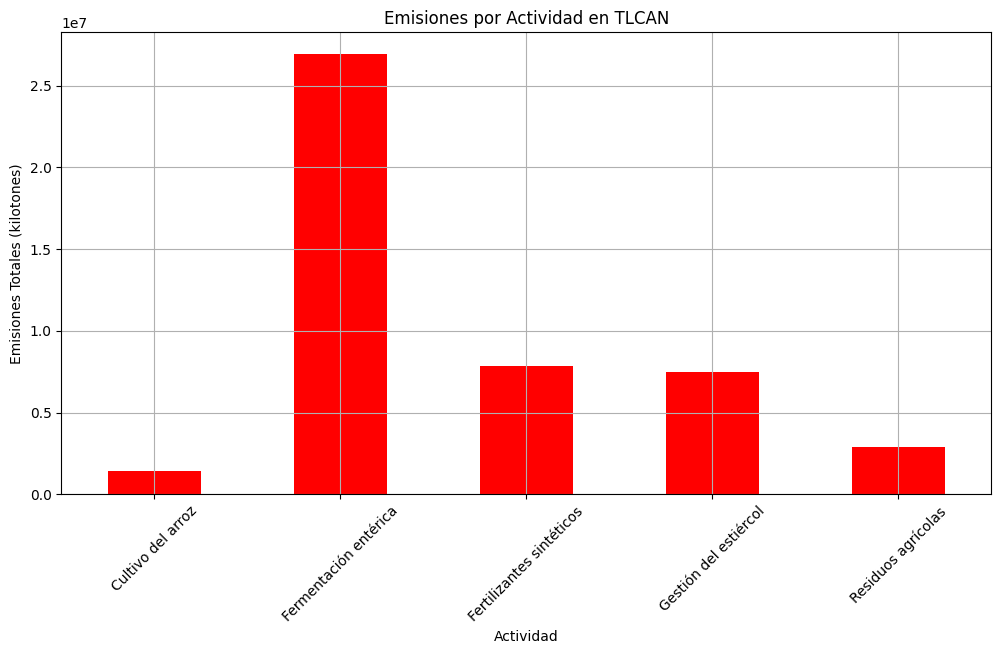

In [31]:
# Agrupar por actividad y calcular emisiones totales en TLCAN
if not tlcan_actividades.empty:
    actividades_tlcan = tlcan_actividades.groupby('Producto')['Valor'].sum()

    # Graficar las emisiones por actividad en TLCAN
    plt.figure(figsize=(12, 6))
    actividades_tlcan.plot(kind='bar', color='red')
    plt.title("Emisiones por Actividad en TLCAN")
    plt.ylabel("Emisiones Totales (kilotones)")
    plt.xlabel("Actividad")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("No hay datos disponibles para actividades en TLCAN.")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

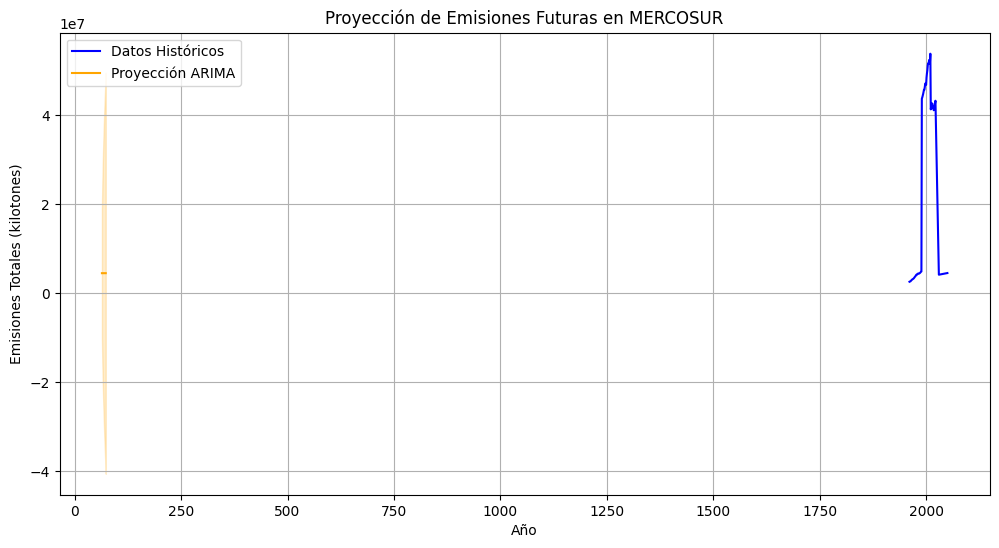

In [32]:
# 3. Predicción de Emisiones Futuras con ARIMA
# Predicción de emisiones para MERCOSUR
if not mercosur_anual.empty:
    model_arima = ARIMA(mercosur_anual.dropna(), order=(1, 1, 1))
    model_fit = model_arima.fit()

    # Predicción a futuro
    forecast = model_fit.get_forecast(steps=10)
    forecast_df = forecast.summary_frame()

    # Graficar predicción
    plt.figure(figsize=(12, 6))
    plt.plot(mercosur_anual, label='Datos Históricos', color='blue')
    plt.plot(forecast_df['mean'], label='Proyección ARIMA', color='orange')
    plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='orange', alpha=0.2)
    plt.title("Proyección de Emisiones Futuras en MERCOSUR")
    plt.ylabel("Emisiones Totales (kilotones)")
    plt.xlabel("Año")
    plt.legend()
    plt.grid(True)
    plt.show()

In [33]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [34]:
# 4. Visualización Interactiva con Gradio (Opcional)
import gradio as gr

def mostrar_tendencias(region):
    if region == 'MERCOSUR':
        data = mercosur_anual
    elif region == 'TLCAN':
        data = tlcan_anual
    else:
        return "Región no disponible."

    fig = data.plot(kind='line', title=f"Tendencia de Emisiones en {region}", figsize=(12, 6)).get_figure()
    return fig

interfaz = gr.Interface(
    fn=mostrar_tendencias,
    inputs=gr.Dropdown(choices=['MERCOSUR', 'TLCAN'], label="Selecciona un Bloque Económico"),
    outputs="plot"
)

interfaz.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dd5cd3b1a4a8e698aa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
